## Delivery_time : 
### Predict delivery time using sorting time.

In [10]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

In [11]:
data = pd.read_csv('delivery_time.csv')
data.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [12]:
data.rename(columns={'Delivery Time': 'delivery',
                   'Sorting Time': 'sorting'},
          inplace=True, errors='raise')

In [13]:
data.describe()

,delivery,sorting
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   delivery  21 non-null     float64
 1   sorting   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 468.0 bytes


In [15]:
data.isnull().sum()

delivery    0
sorting     0
dtype: int64

In [16]:
data['log_delivery'] = np.log(data['delivery'])
data['sqrt_delivery'] = np.sqrt(data['delivery'])
data.head()

,delivery,sorting,log_delivery,sqrt_delivery
0,21.00,10,3.044522,4.582576
1,13.50,4,2.602690,3.674235
2,19.75,6,2.983153,4.444097
3,24.00,9,3.178054,4.898979
4,29.00,10,3.367296,5.385165


Text(0.5, 1.0, 'sqrt_delivery')

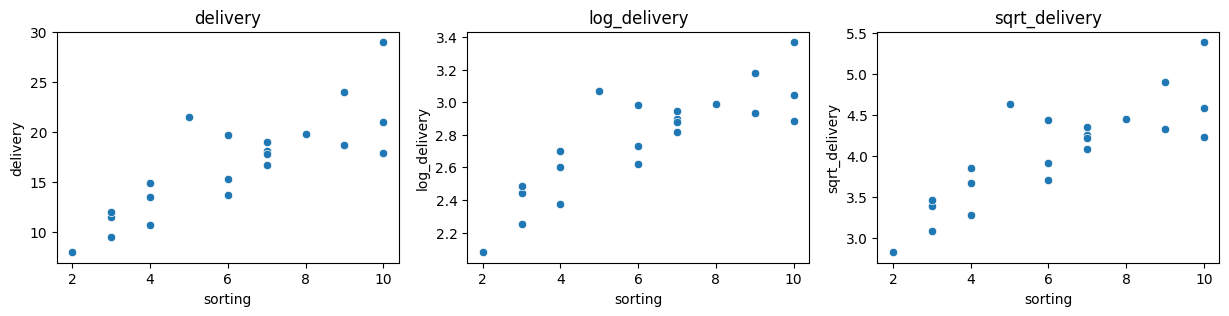

In [18]:
plt.figure(figsize=(15,3))

plt.subplot(1,3,1)
sns.scatterplot(x=data['sorting'],y=data['delivery'])
plt.xlabel("sorting")
plt.title('delivery')

plt.subplot(1,3,2)
sns.scatterplot(x=data['sorting'],y=data['log_delivery'])
plt.xlabel("sorting")
plt.title('log_delivery')

plt.subplot(1,3,3)
sns.scatterplot(x=data['sorting'],y=data['sqrt_delivery'])
plt.xlabel("sorting")
plt.title('sqrt_delivery')

### model building

In [19]:
import statsmodels.formula.api as smf
model= smf.ols('delivery~sorting',data=data).fit()
log_model= smf.ols('log_delivery~sorting',data=data).fit()
sqrt_model= smf.ols('sqrt_delivery~sorting',data=data).fit()

Text(0.5, 1.0, 'sqrt_delivery')

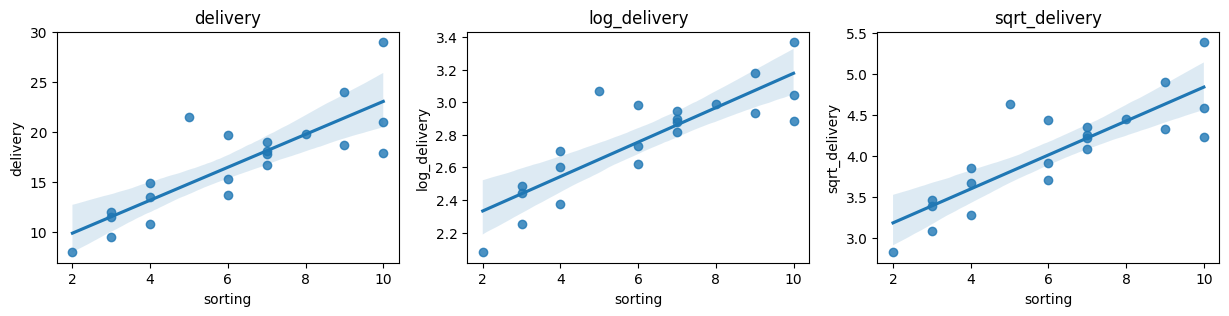

In [21]:
plt.figure(figsize=(15,3))

plt.subplot(1,3,1)
sns.regplot(x='sorting',y='delivery',data=data)
plt.title('delivery')

plt.subplot(1,3,2)
sns.regplot(x='sorting',y='log_delivery',data=data)
plt.title('log_delivery')

plt.subplot(1,3,3)
sns.regplot(x='sorting',y='sqrt_delivery',data=data)
plt.title('sqrt_delivery')

In [22]:
d = {'model':['model','log_model','sqrt_model'],
'intercept':[model.params[1],log_model.params[1],sqrt_model.params[1]],
'p-values':[model.pvalues[1],log_model.pvalues[1],sqrt_model.pvalues[1]],
't-values':[model.tvalues[1],log_model.tvalues[1],sqrt_model.tvalues[1]],
'r-squared':[model.rsquared,log_model.rsquared,sqrt_model.rsquared],
'adj r-squared':[model.rsquared_adj,log_model.rsquared_adj,sqrt_model.rsquared_adj]}
new_df = pd.DataFrame(data=d)
new_df

,model,intercept,p-values,t-values,r-squared,adj r-squared
0,model,1.649020,0.000004,6.387447,0.682271,0.665549
1,log_model,0.105552,0.000002,6.836088,0.710948,0.695735
2,sqrt_model,0.206632,0.000002,6.723095,0.704050,0.688474
